In [135]:
#importing libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import AutoARIMA
from sktime.transformations.bootstrap import STLBootstrapTransformer
from sktime.forecasting.compose import BaggingForecaster
from sktime.forecasting.fbprophet import Prophet

In [30]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv",index_col=1,parse_dates=True)
df.head(2)

,ID,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
Date,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240


In [46]:
#Sort index to be sure that dates are increasing, change data sequence to monthly basis,check if index is correct
df=df.sort_index(ascending=True)
df=df.resample('M').sum()
df.index

DatetimeIndex(['2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', freq='M')

In [39]:
#Checking missing values
df.isnull().sum()

ID                0
Invoice Number    0
Product Code      0
Customer Code     0
QTY               0
Total Price       0
dtype: int64

In [40]:
#Delete missing values
df = df.dropna(axis=0, how='any')

In [41]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2019-04-30 to 2022-09-30
Freq: M
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              42 non-null     int64  
 1   Invoice Number  42 non-null     int64  
 2   Product Code    42 non-null     int64  
 3   Customer Code   42 non-null     int64  
 4   QTY             42 non-null     int64  
 5   Total Price     42 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 2.3 KB


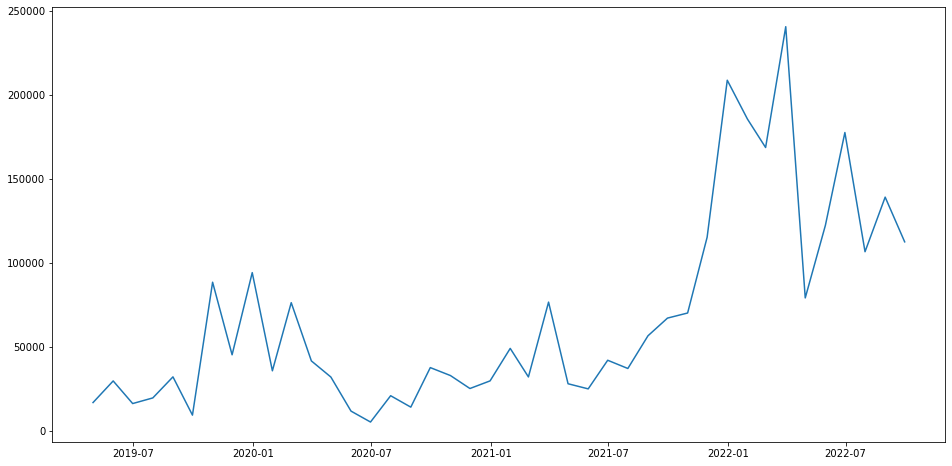

In [42]:
#Selection needed columns and plot time series data
df_ts = df[["QTY"]]
plt.figure(figsize=(16,8))
plt.plot(df_ts)
plt.show()

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

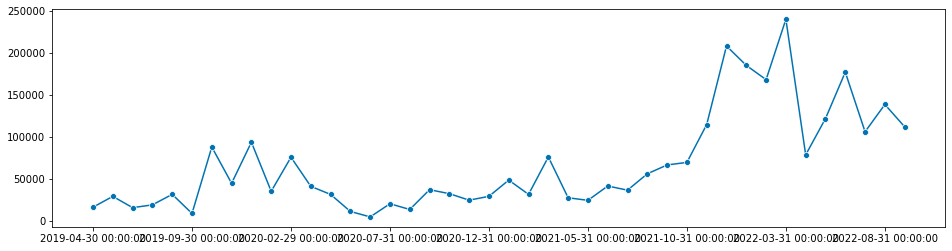

In [43]:
#Plotting time series data with sktime
plot_series(df_ts)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

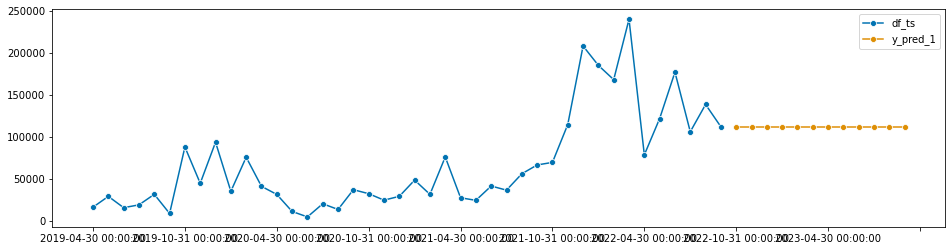

In [143]:
#Lets start forecasting, start with Naive Forecaster, finally we will plot old data with forecasted one(12 months)
forecaster = NaiveForecaster()
forecaster.fit(df_ts)
y_pred_1 = forecaster.predict(fh=[1,2,3,4,5,6,7,8,9,10,11,12])
plot_series(df_ts, y_pred_1, labels=["df_ts", "y_pred_1"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

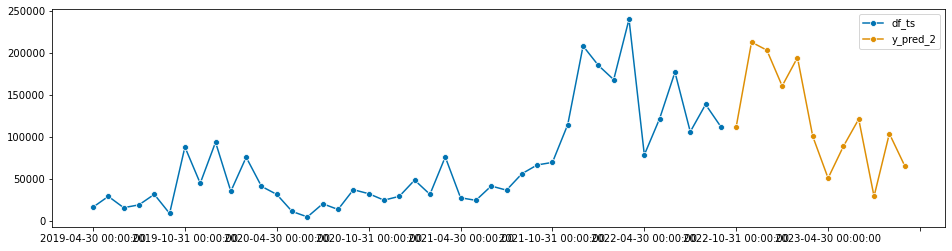

In [144]:
#Arima model,the most important is to understand p,d,q sequence
forecaster = ARIMA(order=(16, 1, 8))
forecaster.fit(df_ts)  
y_pred_2 = forecaster.predict(fh=[1,2,3,4,5,6,7,8,9,10,11,12])
plot_series(df_ts, y_pred_2, labels=["df_ts", "y_pred_2"]) 

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

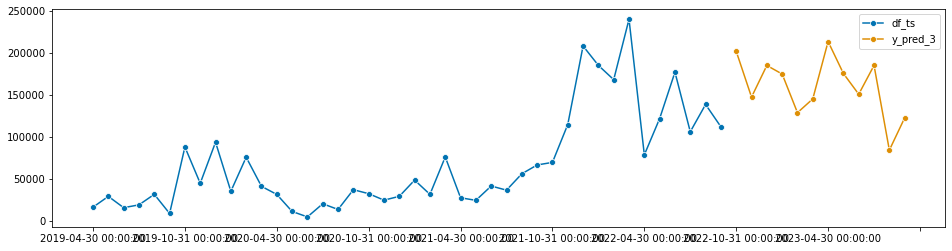

In [145]:
#Lets see how ExponentialSmoothing will work
forecaster = ExponentialSmoothing(trend='mul', seasonal='mul', sp=16)
forecaster.fit(df_ts)  
y_pred_3 = forecaster.predict(fh=[1,2,3,4,5,6,7,8,9,10,11,12])
plot_series(df_ts, y_pred_3, labels=["df_ts", "y_pred_3"]) 

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

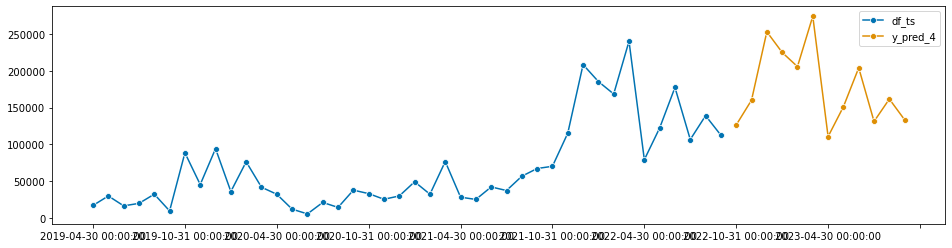

In [146]:
#SKTIME has as well autoarima model to use
forecaster = AutoARIMA(sp=12, d=0, max_p=2, max_q=2, suppress_warnings=True)  
forecaster.fit(df_ts)  
y_pred_4 = forecaster.predict(fh=[1,2,3,4,5,6,7,8,9,10,11,12])
plot_series(df_ts, y_pred_4, labels=["df_ts", "y_pred_4"]) 

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

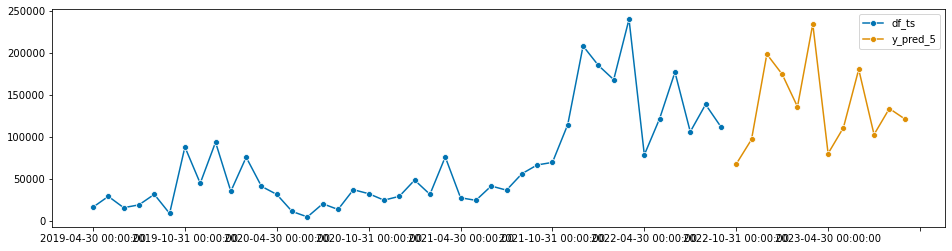

In [147]:
#lets use of the Bagging method with BaggingForecaster
forecaster = BaggingForecaster(
    STLBootstrapTransformer(sp=12), NaiveForecaster(sp=12))  
forecaster.fit(df_ts)  
y_pred_5 = forecaster.predict(fh=[1,2,3,4,5,6,7,8,9,10,11,12])
plot_series(df_ts, y_pred_5, labels=["df_ts", "y_pred_5"]) 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

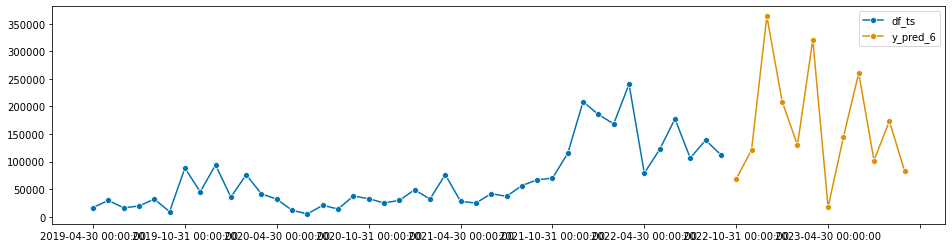

In [148]:
# The last model that we will use is Prohpet
forecaster = Prophet(  
    seasonality_mode='multiplicative',
    n_changepoints=int(len(df_ts) / 12),
    yearly_seasonality=True)
forecaster.fit(df_ts)  
y_pred_6 = forecaster.predict(fh=[1,2,3,4,5,6,7,8,9,10,11,12])
plot_series(df_ts, y_pred_6, labels=["df_ts", "y_pred_6"]) 

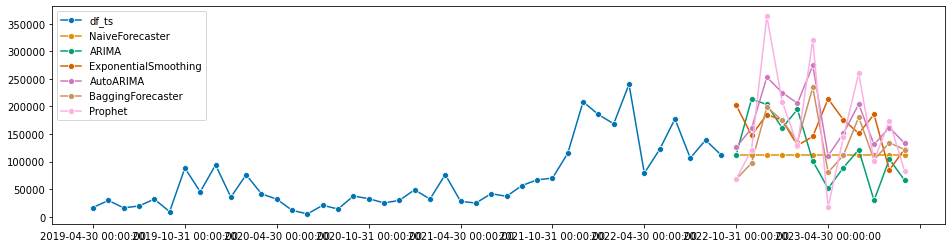

<Figure size 1440x1440 with 0 Axes>

In [152]:
#At the end lets grab all models and plot it together
plot_series(df_ts, y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6,
            labels=["df_ts", "NaiveForecaster","ARIMA","ExponentialSmoothing","AutoARIMA","BaggingForecaster","Prophet"]) 
